In [ ]:
!pip install torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
torch.cuda.is_available()

False

In [ ]:
import torch

print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))


0
Tesla T4


In [ ]:
from google.colab import files
import pandas as pd

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
print(df.head())


Saving Iris.csv to Iris (2).csv
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("Iris.csv")

print(df.columns)

if "Id" in df.columns:
    df = df.drop("Id", axis=1)

X = df.drop("Species", axis=1).values
le = LabelEncoder()
y = le.fit_transform(df["Species"].values)
# chia dữ liệu với test size -0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv("Iris.csv")

print(df.columns)

if "Id" in df.columns:
    df = df.drop("Id", axis=1)

X = df.drop("Species", axis=1).values
le = LabelEncoder()
y = le.fit_transform(df["Species"].values)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [ ]:
print(f'train size {len(y_train)}')

train size 120


In [ ]:
import numpy as np
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)


[0 1 2] [40 41 39]


In [ ]:
# Tính đạo hàm bằng pytorch
# cho y = 2x^4 + x^3 3x^2 +5x+1
# tính đạo hàm của hàm số
x = torch.tensor(2.0, requires_grad=True)
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
y.backward()
print(x.grad)



tensor(93.)


In [ ]:
# bài tập ở lớp
# Cho y = 5x^6+3x^3+2x^1+x+2x+5x^4+1
# Cho biết độ dốc của đa thức trên tại điểm nào
import torch

x = torch.tensor(float(input("Nhập giá trị x: ")), requires_grad=True)
y = 5*x**6 + 5*x**4 + 3*x**3 + 5*x + 1
y.backward()
print(f"Độ dốc tại x = {x.item()} là: {x.grad.item()}")




Nhập giá trị x: 2
Độ dốc tại x = 2.0 là: 1161.0


In [ ]:
# bài tập về nhà 1
import torch

x = torch.tensor(2.0, requires_grad=True)

epochs = 10
alpha = 0.1

for i in range(epochs):
    y = x**3 + 2*x**2 + 5*x + 1
    y.backward()

    with torch.no_grad():
        x -= alpha * x.grad

    print(f"Vòng lặp {i+1}: x = {x.item()}")

    x.grad.zero_()


Vòng lặp 1: x = -0.5
Vòng lặp 2: x = -0.875
Vòng lặp 3: x = -1.2546875476837158
Vòng lặp 4: x = -1.7250847816467285
Vòng lặp 5: x = -2.427826166152954
Vòng lặp 6: x = -3.7249975204467773
Vòng lặp 7: x = -6.897680282592773
Vòng lặp 8: x = -18.912006378173828
Vòng lặp 9: x = -119.14640808105469
Vòng lặp 10: x = -4330.74755859375


Epoch 10: Loss = 5.933732509613037, w = 3.7582168579101562, b = 0.19224761426448822
Epoch 20: Loss = 5.533435821533203, w = 3.7270309925079346, b = 0.3892427384853363
Epoch 30: Loss = 5.164495944976807, w = 3.696985960006714, b = 0.5783489346504211
Epoch 40: Loss = 4.8244524002075195, w = 3.6681416034698486, b = 0.75989830493927
Epoch 50: Loss = 4.511044502258301, w = 3.6404500007629395, b = 0.9341927766799927
Epoch 60: Loss = 4.222184658050537, w = 3.6138648986816406, b = 1.1015220880508423
Epoch 70: Loss = 3.9559481143951416, w = 3.5883421897888184, b = 1.2621649503707886
Epoch 80: Loss = 3.710566520690918, w = 3.5638394355773926, b = 1.4163885116577148
Epoch 90: Loss = 3.4844014644622803, w = 3.540315866470337, b = 1.5644489526748657
Epoch 100: Loss = 3.275954008102417, w = 3.5177321434020996, b = 1.7065927982330322


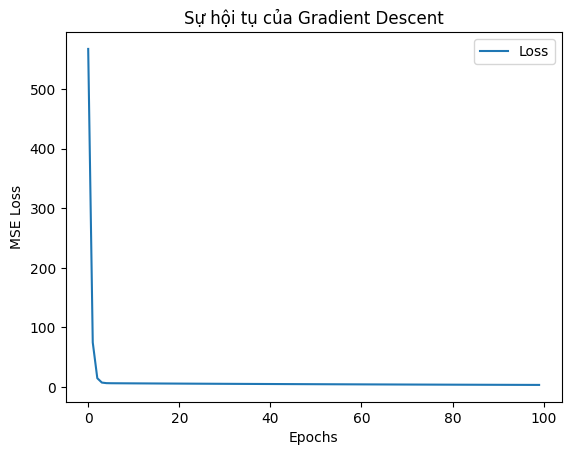

Trọng số cuối cùng: w = 3.5177321434020996, b = 1.7065927982330322


In [ ]:
# bài tập về nhà 2
import torch
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
x_data = np.random.uniform(1, 10, 50)
noise = np.random.normal(0, 1, 50)
y_data = 3 * x_data + 5 + noise

x_train = torch.tensor(x_data, dtype=torch.float32).reshape(-1, 1)
y_train = torch.tensor(y_data, dtype=torch.float32).reshape(-1, 1)

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

learning_rate = 0.01
epochs = 100
losses = []

for epoch in range(epochs):
    y_pred = w * x_train + b
    loss = torch.mean((y_pred - y_train) ** 2)
    loss.backward()

    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

    losses.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item()}, w = {w.item()}, b = {b.item()}")

plt.plot(range(epochs), losses, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Sự hội tụ của Gradient Descent")
plt.legend()
plt.show()

print(f"Trọng số cuối cùng: w = {w.item()}, b = {b.item()}")



In [ ]:
# Bài tập về nhà 3


In [ ]:
# Bài tập về nhà 4
import torch
# Tạo tensor
empty_tensor = torch.empty(3, 3)
print(empty_tensor)


tensor([[-1.3998e+16,  4.3558e-41, -1.3997e+16],
        [ 4.3558e-41, -1.3999e+16,  4.3558e-41],
        [-1.3999e+16,  4.3558e-41, -1.4000e+16]])


In [ ]:
# Tạo tensor toàn số 0
zeros_tensor = torch.zeros(3, 3)
print(zeros_tensor)



tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
 # Tạo tensor toàn bộ là 1
ones_tensor = torch.ones(3, 3)
print(ones_tensor)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
 # Tạo tensor với giá trị ngẫu nhiên từ 0 đến 1
random_tensor = torch.rand(3, 3)
print(random_tensor)


tensor([[0.8536, 0.7475, 0.4903],
        [0.7739, 0.7218, 0.9076],
        [0.9968, 0.6151, 0.6651]])


In [ ]:
# Tạo tensor 1D với các giá trị từ 0 đến 5 và 2 hàng 3 côt
x = torch.arange(6)
reshaped_x = x.view(2, 3)
print(reshaped_x)


tensor([[0, 1, 2],
        [3, 4, 5]])


In [ ]:
# Tạo tensor có cùng shape như reshaped_x
y = torch.zeros(2, 3)
reshaped_x_as = x.view_as(y)
print(reshaped_x_as)


tensor([[0, 1, 2],
        [3, 4, 5]])
